| |<font size="5">Decision Tree  شجرة القرار</font>|
|-:|-:|
|<img src="https://kongakura.fr/images/forest155689_960_720-5de93979ba683.png" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4">في تعويض القيم الناقصة SimpleImputer  توظيف خوارزمية </font>| 
||<font size="4">في اختيار أفضل الخصائص المؤثرة Lasso  توظيف خوارزمية </font>| 
||<font size="4"> التخطيط البياني لأفضل الخصائص التي تم الأحتفاظ بها </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|

In [3]:
pwd

'/content'

In [5]:
cd drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [33]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/features_kept1.csv", index_col=0)

In [34]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
0,5.0,548.0,2566.0,196.0,0.0,706.0,854.0,0.0,0.0,8450.0,208500.0
1,31.0,460.0,2524.0,0.0,298.0,978.0,0.0,0.0,0.0,9600.0,181500.0
2,6.0,608.0,2706.0,162.0,0.0,486.0,866.0,0.0,0.0,11250.0,223500.0
3,36.0,642.0,2473.0,0.0,0.0,216.0,756.0,0.0,0.0,9550.0,140000.0
4,8.0,836.0,3343.0,350.0,192.0,655.0,1053.0,0.0,0.0,14260.0,250000.0


In [35]:

df.shape

(1460, 11)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1455 non-null   float64
 1   GarageArea  1455 non-null   float64
 2   TotalSF     1455 non-null   float64
 3   MasVnrArea  1455 non-null   float64
 4   WoodDeckSF  1455 non-null   float64
 5   BsmtFinSF1  1455 non-null   float64
 6   2ndFlrSF    1455 non-null   float64
 7   BsmtFinSF2  1455 non-null   float64
 8   MiscVal     1455 non-null   float64
 9   LotArea     1455 non-null   float64
 10  SalePrice   1455 non-null   float64
dtypes: float64(11)
memory usage: 136.9 KB


In [37]:
#![](https://miro.medium.com/max/564/1*3vNC_78uCFsFceUGc_mUfQ.png)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [38]:
# التدقيق في احصائيات البينات للوقوف على التباين فيها إن وجد
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1455.0,22.967010,20.627975,-1.0,4.0,14.0,41.0,60.0
GarageArea,1455.0,470.047423,208.171498,0.0,329.0,478.0,576.0,1166.0
TotalSF,1455.0,2564.788316,786.664827,334.0,2014.0,2475.0,3005.0,7814.0
MasVnrArea,1455.0,102.615066,178.887185,0.0,0.0,0.0,163.5,1600.0
WoodDeckSF,1455.0,93.990378,125.115550,0.0,0.0,0.0,168.0,857.0
BsmtFinSF1,1455.0,439.364261,434.191781,0.0,0.0,383.0,710.0,2260.0
2ndFlrSF,1455.0,347.531959,436.612819,0.0,0.0,0.0,728.0,2065.0
BsmtFinSF2,1455.0,46.709278,161.573270,0.0,0.0,0.0,0.0,1474.0
MiscVal,1455.0,43.253608,496.785398,0.0,0.0,0.0,0.0,15500.0
LotArea,1455.0,10455.472165,9880.273055,1300.0,7537.5,9464.0,11568.5,215245.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


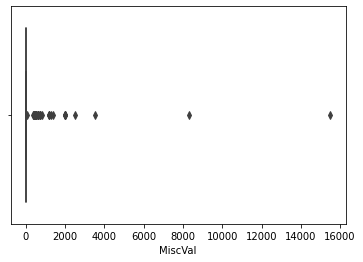

In [39]:
import seaborn as sns
_=sns.boxplot(df.MiscVal)

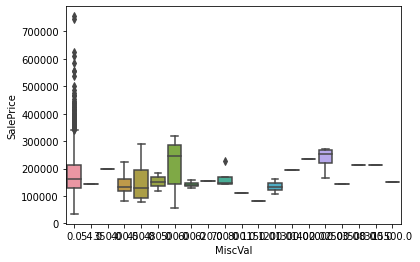

In [40]:
import seaborn as sns
_=sns.boxplot(x=df.MiscVal, y=df.SalePrice)

In [48]:
df.isna().sum()

Age           0
GarageArea    0
TotalSF       0
MasVnrArea    0
WoodDeckSF    0
BsmtFinSF1    0
2ndFlrSF      0
BsmtFinSF2    0
MiscVal       0
LotArea       0
SalePrice     0
dtype: int64

In [42]:
df.columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF',
       'BsmtFinSF1', '2ndFlrSF', 'BsmtFinSF2', 'MiscVal', 'LotArea',
       'SalePrice'],
      dtype='object')

In [47]:

for col in df.columns: 
  df[col].fillna(df[col].mean(), inplace=True)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [49]:
#    سنقتصر فقط على المتغيرات الأكثر تاثيرا في تنيجة التنبؤ للتعريف بخوارزمية شجرة القرار فقط

#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF',
       'BsmtFinSF1', '2ndFlrSF', 'BsmtFinSF2', 'MiscVal', 'LotArea'],
      dtype='object')

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [50]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [51]:
#  إعادة تشكيل توزيع البيانات  
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## نموذج شجرة القرار الانحداري
![](https://static.thenounproject.com/png/2010152-200.png)

In [52]:
# Model نموذج 
from sklearn.tree import DecisionTreeRegressor
model_forest= DecisionTreeRegressor(max_depth=4)  #  تغيير عمق الشجرة

![](https://i.ibb.co/rts662Y/Decision-tree-2.jpg)

In [53]:
# تدريب
model_forest.fit(X_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
from sklearn.impute import SimpleImputer

imput= SimpleImputer(strategy="mean")
X= imput.fit_transform(X )[1]

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [55]:
# نسية تمثيل  المتغيرات الغير مرتبطة بتباين الهدف 
f"  Score  : {model_forest.score(X_test_scaled, y_test):3f}"

'  Score  : 0.048769'

In [56]:
# التنبؤ 
y_train_pred = model_forest.predict(X_train_scaled)
y_test_pred = model_forest.predict(X_test_scaled)

In [ ]:
#  قياس معايير التنبؤ
from sklearn import metrics
print(f'MSE train: {metrics.mean_squared_error(y_train, y_train_pred):.3f}, MSE test: {metrics.mean_squared_error(y_test, y_test_pred):.3f}')
 

print(f'R2 train:{metrics.r2_score(y_train, y_train_pred):.3f}, R2 test: { metrics.r2_score(y_test, y_test_pred):.3f}')

MSE train: 0.034, MSE test: 0.045
R2 train:0.782, R2 test: 0.735


In [ ]:
! pip install scikit-plot

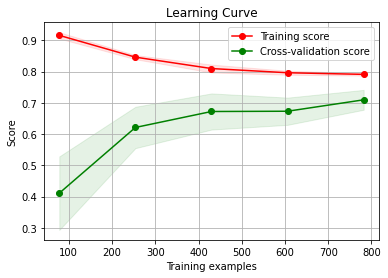

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model_forest, X_train, y_train, scoring="r2") # neg_mean_absolute_error")

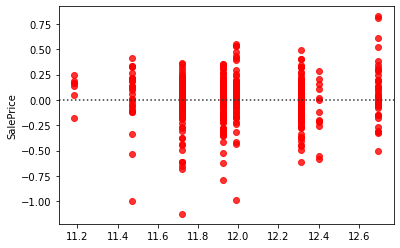

In [ ]:
import seaborn as sns
# نخطيط البقايا
_=sns.residplot(y_test_pred, y_test, color="r")

https://kongakura.fr/article/arbre-de-decision-python

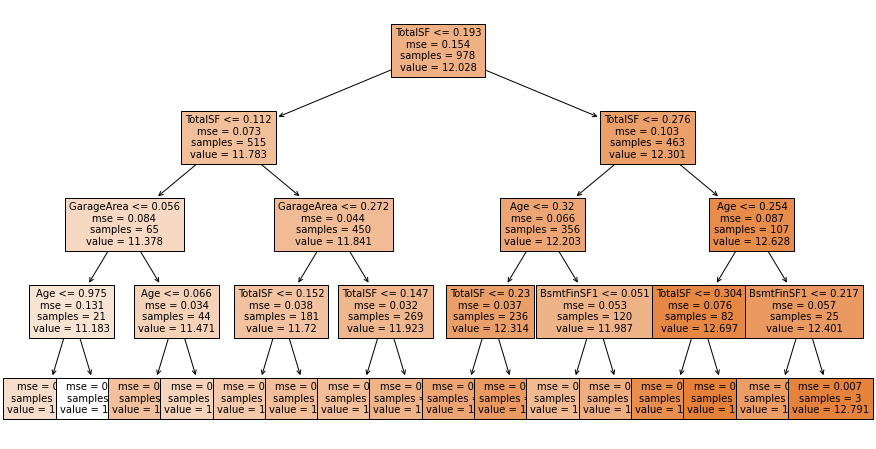

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8) )
tree.plot_tree(model_forest, feature_names=X.columns, class_names=["SalePrice"],filled=True ,
               fontsize=10, precision=3 )
plt.show()

In [ ]:

# بعض البيانات ناقصة بشكر كبير 

(df.isna().sum()/df.shape[0]).sort_values(ascending=False)


SalePrice     0.0
LotArea       0.0
MiscVal       0.0
1stFlrSF      0.0
BsmtFinSF1    0.0
2ndFlrSF      0.0
WoodDeckSF    0.0
MasVnrArea    0.0
TotalSF       0.0
GarageArea    0.0
Age           0.0
dtype: float64